In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from secrets.con_str import con_str

engine = create_engine(con_str)

In [27]:
sql = """
SELECT
--  intersections.geom AS inter_geom,
--  parcels.geom AS parcel_geom,
--  footprints.geom AS foot_geom,
	intersections.foot_pct,
	intersections.parcel_pct,
	intersections.area AS inter_area,
	ST_Collect(ARRAY[intersections.geom, parcels.geom, footprints.geom]) as geom
FROM intersections
JOIN parcels
ON parcels.gid = intersections.parcel_gid
JOIN footprints
ON footprints.gid = intersections.foot_gid
-- WHERE area < 0.7369490517524178
WHERE area < 100;
--ORDER BY inter_area DESC;
"""
intersect_df = gpd.read_postgis(sql, engine)
intersect_df.head()

/Users/tom/opt/miniconda3/envs/geopandas_env2/lib/python3.9/site-packages/geopandas/_vectorized.py:142: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,foot_pct,parcel_pct,inter_area,geom
0,0.000201,0.000029,0.241056,GEOMETRYCOLLECTION (POLYGON ((1336151.405 4176...
1,0.191621,0.021053,74.137204,GEOMETRYCOLLECTION (POLYGON ((1363158.462 4034...
2,0.020140,0.007036,33.369385,GEOMETRYCOLLECTION (POLYGON ((1327157.614 4234...
3,0.192386,0.042703,98.457855,GEOMETRYCOLLECTION (POLYGON ((1307358.462 3762...
4,0.084691,0.028965,95.762865,GEOMETRYCOLLECTION (POLYGON ((1319929.200 3984...


10
foot_pct                                               0.064889
parcel_pct                                             0.000377
inter_area                                             9.972582
geom          (POLYGON ((1361719.167233169 432287.0349554270...
Name: 69338, dtype: object


/Users/tom/opt/miniconda3/envs/geopandas_env2/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/tom/opt/miniconda3/envs/geopandas_env2/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/tom/opt/miniconda3/envs/geopandas_env2/lib/python3.9/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a

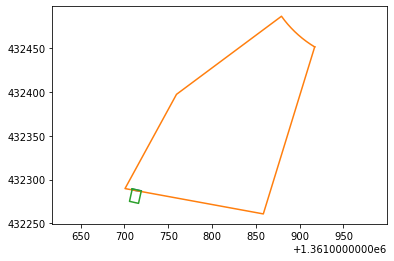

20
foot_pct                                               0.132119
parcel_pct                                             0.000417
inter_area                                            19.872155
geom          (POLYGON ((1356342.1833450256 485766.568924552...
Name: 98174, dtype: object


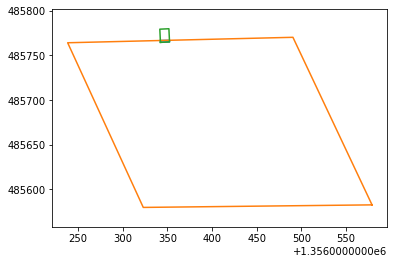

30
foot_pct                                               0.196583
parcel_pct                                             0.004094
inter_area                                            29.489215
geom          (POLYGON ((1373645.4554863984 348219.569244623...
Name: 31573, dtype: object


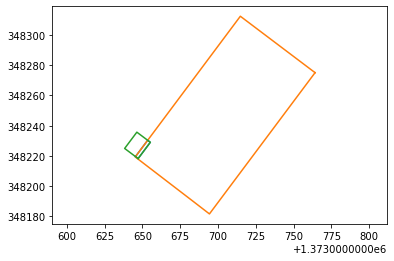

40
foot_pct                                               0.258453
parcel_pct                                             0.000736
inter_area                                            38.891959
geom          (POLYGON ((1364775.4367111772 378779.599647671...
Name: 11612, dtype: object


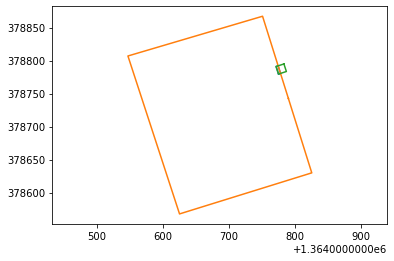

50
foot_pct                                               0.332733
parcel_pct                                             0.007307
inter_area                                            49.913146
geom          (POLYGON ((1318795.340679422 429886.2707280963...
Name: 71737, dtype: object


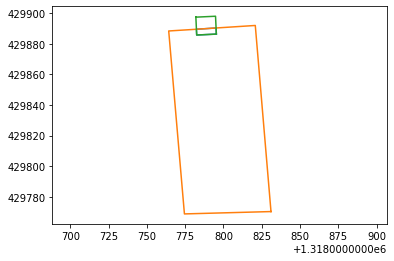

60
foot_pct                                                0.39315
parcel_pct                                             0.003964
inter_area                                            59.423381
geom          (POLYGON ((1410649.4364984185 469678.540552839...
Name: 80, dtype: object


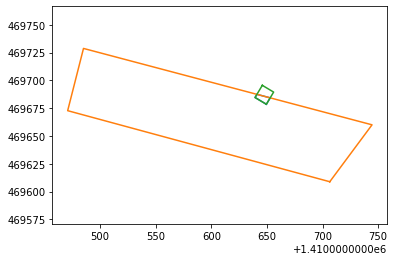

70
foot_pct                                               0.461723
parcel_pct                                             0.005787
inter_area                                            69.764014
geom          (POLYGON ((1333143.3418390006 362455.762872844...
Name: 62536, dtype: object


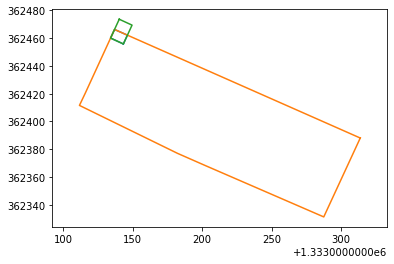

80
foot_pct                                               0.526334
parcel_pct                                             0.008262
inter_area                                            79.672344
geom          (POLYGON ((1334204.5922656225 426616.462970205...
Name: 56979, dtype: object


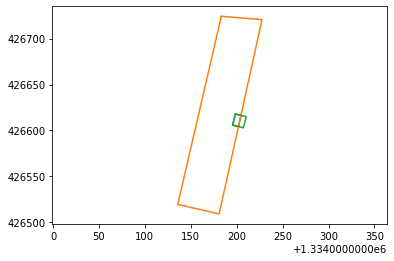

90
foot_pct                                               0.598254
parcel_pct                                             0.022303
inter_area                                            89.794112
geom          (POLYGON ((1421741.7059805095 481545.259273424...
Name: 37425, dtype: object


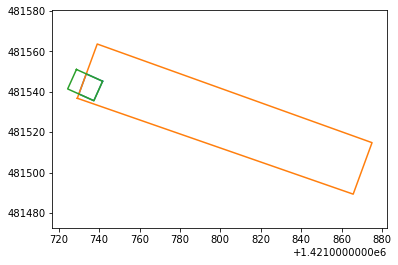

In [36]:
for max_area in range(10,100,10):
  max_foot_pct_row = intersect_df[
    intersect_df['inter_area'] < max_area].sort_values(by='foot_pct', ascending=False).iloc[0]
  print(max_area)
  print(max_foot_pct_row)
  shapes = max_foot_pct_row['geom']
  for el in shapes.geoms:
    geom_type = el.geom_type
    if geom_type == 'Polygon':
      plt.plot(*el.exterior.xy)
    elif geom_type == 'MultiPolygon':
      for geom in el.geoms:
        plt.plot(*geom.exterior.xy)

  # Set (current) axis to be equal before showing plot
  plt.gca().axis("equal")
  plt.show()